<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_47_Predict_the_price_of_a_listing_in_Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

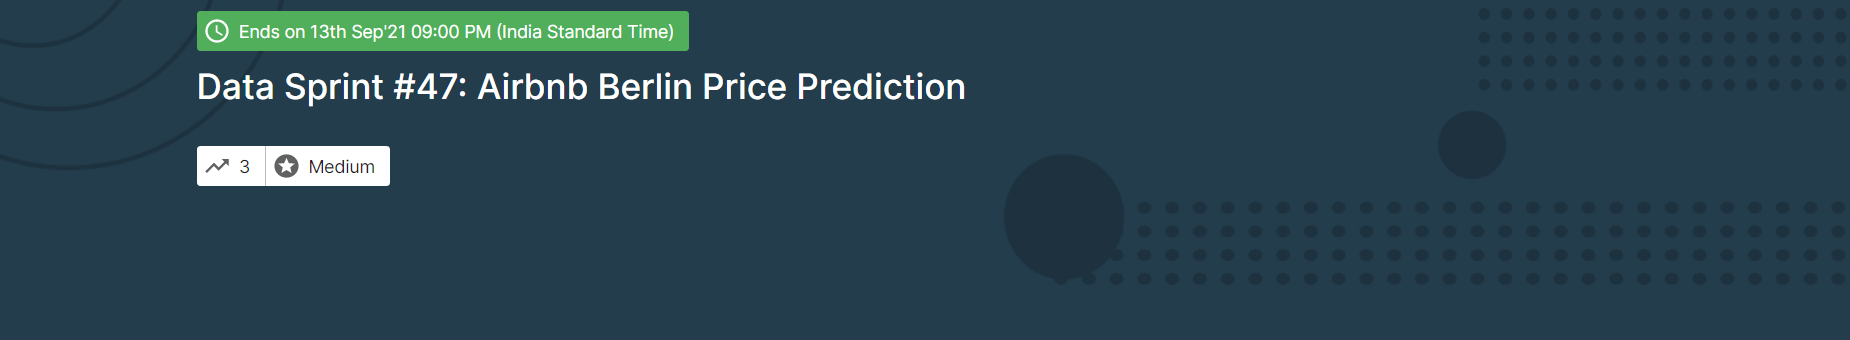

## Problem Statement
To build a machine learning model that will automatically predict the price for the listing.

## Evaluation 
Submissions are evaluated using **RMSE**

## Data Description

There are more than 15k listings of Airbnb in the training set and below is the data dictionary:

* Listing ID - unique id of the listing

* Listing Name - this is the name of the listing, this is anonymized in the dataset and you can feel free to drop this variable from the data

* Host ID - unique ID of the listing host

* Host Name - name of the host who manages/owns the listing

* Host Since - date since they have been hosting on Airbnb

* Host Response Time - Avg time taken by the host to respond to any query they get

* Host Response Rate - Avg response rate to the queries that the host receives for their listing

* Is Superhost - this field says whether the host is superhost or not. Superhost implies the best-rated host badge given by Airbnb based on the overall listing experience

* neighbourhood - provides information about neighbourhood of the listing

* Neighborhood Group - provides information about neighbourhood group of the listing

* City

* Postal Code

* Country Code

* Country

* Latitude

* Longitude

* Is Exact Location

* Property Type

* Room Type

* Accomodates

* Bathrooms

* Bedrooms

* Beds

* Square Feet

* Guests Included

* Min Nights

* Reviews

* First Review

* Last Review

* Overall Rating

* Accuracy Rating

* Cleanliness Rating

* Checkin Rating

* Communication Rating

* Location Rating

* Value Rating

* Instant Bookable

* Business Travel Ready

* **Price** - price is the target variable

 

## Sample Submissions
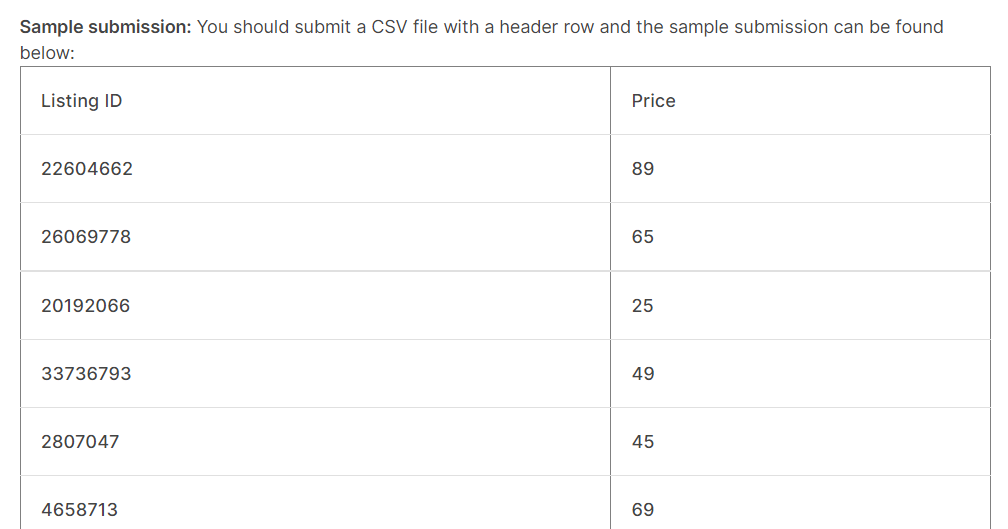

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files
files.upload()

Saving test_airbnb_berlin.csv to test_airbnb_berlin.csv
Saving train_airbnb_berlin.csv to train_airbnb_berlin.csv


{'test_airbnb_berlin.csv': b'Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country Code,Country,Latitude,Longitude,Is Exact Location,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Square Feet,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready\r\n13338017,*,19153032,Sonfron,15-06-2014,within a few hours,91%,t,Kreuzberg,Friedrichshain-Kreuzberg,Berlin,10997,DE,Germany,52.50053,13.44184,t,Apartment,Entire home/apt,2,1,1,1,,2,2,131,04-08-2016,05-05-2019,97,10,10,10,10,10,10,f,f\r\n2899239,*,1629859,Welgin,11-02-2011,within an hour,100%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10247,DE,Germany,52.51647,13.45862,t,Apartment,Entire home/apt,4,1.5,2,4,,2,5,22,03-05-2013,27-02-2019,75,8,5,8,8,9,7,f,f\r\n4415

https://www.kaggle.com/antoange/airnbnb-prices-with-random-forest-regressors

In [3]:
import shutil
shutil.copy("/content/train_airbnb_berlin.csv","/content/drive/MyDrive/dphi/data_sprint_47")


'/content/drive/MyDrive/dphi/data_sprint_47/train_airbnb_berlin.csv'

In [4]:
shutil.copy("/content/test_airbnb_berlin.csv","/content/drive/MyDrive/dphi/data_sprint_47")


'/content/drive/MyDrive/dphi/data_sprint_47/test_airbnb_berlin.csv'

## Import Data Processing Libraries

In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import geopy.distance
#
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv("/content/drive/MyDrive/dphi/data_sprint_47/train_airbnb_berlin.csv")
test = pd.read_csv("/content/drive/MyDrive/dphi/data_sprint_47/test_airbnb_berlin.csv")

## Train Data analysis

In [8]:
train.head()

Listing ID Listing Name  ...  Business Travel Ready Price
0  19665213.0            *  ...                      f  26.0
1   6436842.0            *  ...                      f  41.0
2  10559468.0            *  ...                      f  50.0
3  27215482.0            *  ...                      f  50.0
4  27287546.0            *  ...                      f  55.0

[5 rows x 39 columns]

## Missing values in training data

In [12]:
train.isnull().sum()[train.isnull().sum() > 0] / train.shape[0]

Listing ID              0.000064
Listing Name            0.003441
Host Name               0.001402
Host Since              0.001338
Host Response Time      0.450867
Host Response Rate      0.450867
Is Superhost            0.001466
City                    0.000064
Postal Code             0.014593
Bathrooms               0.000892
Bedrooms                0.000319
Beds                    0.000510
Square Feet             0.980691
First Review            0.172381
Last Review             0.172445
Overall Rating          0.188759
Accuracy Rating         0.189332
Cleanliness Rating      0.189268
Checkin Rating          0.189460
Communication Rating    0.189268
Location Rating         0.189332
Value Rating            0.189396
Price                   0.000574
dtype: float64

##Inspect column types

In [14]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Listing ID             15691 non-null  float64
 1   Listing Name           15638 non-null  object 
 2   Host ID                15692 non-null  float64
 3   Host Name              15670 non-null  object 
 4   Host Since             15671 non-null  object 
 5   Host Response Time     8617 non-null   object 
 6   Host Response Rate     8617 non-null   object 
 7   Is Superhost           15669 non-null  object 
 8   neighbourhood          15692 non-null  object 
 9   Neighborhood Group     15692 non-null  object 
 10  City                   15691 non-null  object 
 11  Postal Code            15463 non-null  object 
 12  Country Code           15692 non-null  object 
 13  Country                15692 non-null  object 
 14  Latitude               15692 non-null  float64
 15  Lo

In [16]:
train['Price'].isnull().sum()

9

## Remove the 9 rows fromthe training data where Price(target) is null

In [17]:
train = train[~ train['Price'].isnull()]
train.shape

(15683, 39)

## Checking for duplicates

In [18]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*train.shape))

# ... and duplicates
print("It contains {} duplicates.".format(train.duplicated().sum()))

The dataset has 15683 rows and 39 columns.
It contains 0 duplicates.


## Check for categorical columns and numerical columns

In [20]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in train.columns if train[cname].nunique() < 10 and 
                        train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in train.columns if train[cname].dtype in ['int64', 'float64']]

In [21]:
len(categorical_cols),len(numerical_cols)

(13, 14)

In [22]:
len(categorical_cols)+ len(numerical_cols)

27

In [23]:
train.shape

(15683, 39)

In [25]:
train[categorical_cols].nunique()

Listing Name             1
Host Response Time       4
Is Superhost             2
City                     2
Country Code             1
Country                  1
Is Exact Location        2
Room Type                3
Bathrooms                8
Bedrooms                 7
Guests Included          8
Instant Bookable         2
Business Travel Ready    1
dtype: int64

In [39]:
for cols in categorical_cols:
  print(f"column name : {cols} unique counts : {train[cols].nunique()} ")
  print(f"unique value count % : {train[cols].value_counts(normalize=True)}")

column name : Listing Name unique counts : 1 
unique value count % : *    1.0
Name: Listing Name, dtype: float64
column name : Host Response Time unique counts : 4 
unique value count % : within an hour        0.524164
within a day          0.228392
within a few hours    0.204809
a few days or more    0.042635
Name: Host Response Time, dtype: float64
column name : Is Superhost unique counts : 2 
unique value count % : f    0.846169
t    0.153831
Name: Is Superhost, dtype: float64
column name : City unique counts : 2 
unique value count % : Berlin    0.99713
*         0.00287
Name: City, dtype: float64
column name : Country Code unique counts : 1 
unique value count % : DE    1.0
Name: Country Code, dtype: float64
column name : Country unique counts : 1 
unique value count % : Germany    1.0
Name: Country, dtype: float64
column name : Is Exact Location unique counts : 2 
unique value count % : t    0.739399
f    0.260601
Name: Is Exact Location, dtype: float64
column name : Room Type un

In [40]:
categorical_columns_keep = ['Host Response Time','Is Superhost','Is Exact Location','Room Type','Bathrooms','Bedrooms','Guests Included','Instant Bookable']

In [41]:
categorical_columns_keep

['Host Response Time',
 'Is Superhost',
 'Is Exact Location',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Guests Included',
 'Instant Bookable']

In [42]:
columns_to_keep = categorical_columns_keep + numerical_cols
columns_to_keep

['Host Response Time',
 'Is Superhost',
 'Is Exact Location',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Guests Included',
 'Instant Bookable',
 'Listing ID',
 'Host ID',
 'Latitude',
 'Longitude',
 'Square Feet',
 'Reviews',
 'Overall Rating',
 'Accuracy Rating',
 'Cleanliness Rating',
 'Checkin Rating',
 'Communication Rating',
 'Location Rating',
 'Value Rating',
 'Price']

In [43]:
train = train[columns_to_keep]
train.shape

(15683, 22)

## Missing values in train data

In [50]:
train.isnull().sum()[train.isnull().sum() > 0] /train.shape[0]

Host Response Time      0.451125
Is Superhost            0.001467
Bathrooms               0.000893
Bedrooms                0.000319
Listing ID              0.000064
Square Feet             0.980680
Overall Rating          0.188421
Accuracy Rating         0.188994
Cleanliness Rating      0.188931
Checkin Rating          0.189122
Communication Rating    0.188931
Location Rating         0.188994
Value Rating            0.189058
dtype: float64

In [54]:
train.isnull().sum()/train.shape[0]

Host Response Time      0.451125
Is Superhost            0.001467
Is Exact Location       0.000000
Room Type               0.000000
Bathrooms               0.000893
Bedrooms                0.000319
Guests Included         0.000000
Instant Bookable        0.000000
Listing ID              0.000064
Host ID                 0.000000
Latitude                0.000000
Longitude               0.000000
Square Feet             0.980680
Reviews                 0.000000
Overall Rating          0.188421
Accuracy Rating         0.188994
Cleanliness Rating      0.188931
Checkin Rating          0.189122
Communication Rating    0.188931
Location Rating         0.188994
Value Rating            0.189058
Price                   0.000000
dtype: float64

In [56]:
train = train.drop(['Host Response Time','Square Feet'],axis=1)

In [57]:
train.head()

Is Superhost Is Exact Location  ... Value Rating Price
0            f                 t  ...         10.0  26.0
1            f                 t  ...         10.0  41.0
2            f                 t  ...         10.0  50.0
3            f                 t  ...          9.0  50.0
4            t                 t  ...          NaN  55.0

[5 rows x 20 columns]

## Train Test Split

In [60]:
X = train.drop('Price',axis=1)
y = train['Price']

In [63]:
# Divide data into training and validation subsets
from sklearn.model_selection import train_test_split
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

In [74]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [69]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
                                transformers=[
                                          ('num', numerical_transformer, numerical_cols),
                                          ('cat', categorical_transformer, categorical_cols)
                                            ]
                                 )

In [70]:
# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [71]:
X_train.head()

Is Superhost Is Exact Location  ... Location Rating Value Rating
2755             f                 t  ...            10.0          9.0
8633             f                 t  ...            10.0         10.0
14197            f                 t  ...            10.0         10.0
14613            f                 f  ...             6.0          9.0
8727             f                 t  ...            10.0         10.0

[5 rows x 19 columns]

In [73]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]

Is Superhost              20
Bathrooms                 12
Bedrooms                   2
Listing ID                 1
Overall Rating          2362
Accuracy Rating         2370
Cleanliness Rating      2369
Checkin Rating          2372
Communication Rating    2369
Location Rating         2370
Value Rating            2370
dtype: int64

In [72]:
X_valid.head()

Is Superhost Is Exact Location  ... Location Rating Value Rating
13670            f                 t  ...             NaN          NaN
15381            f                 f  ...             9.0          9.0
9706             t                 f  ...            10.0         10.0
12612            f                 f  ...            10.0         10.0
3072             f                 t  ...            10.0          9.0

[5 rows x 19 columns]

In [97]:
train.shape

(15683, 20)

In [96]:
train['Listing ID'].nunique()

15659

In [93]:
for col in categorical_cols:
  X_train[col] = categorical_transformer.fit_transform(X_train[col].values.reshape(-1,1))[:,0]

In [100]:
for col in categorical_cols:
  X_valid[col] = categorical_transformer.transform(X_valid[col].values.reshape(-1,1))[:,0]

In [98]:
for col in numerical_cols:
  X_train[col] = numerical_transformer.fit_transform(X_train[col].values.reshape(-1,1))[:,0]

In [101]:
for col in numerical_cols:
  X_valid[col] = numerical_transformer.fit_transform(X_valid[col].values.reshape(-1,1))[:,0]

In [99]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]

Series([], dtype: int64)

In [102]:
X_valid.isnull().sum()[X_valid.isnull().sum() > 0]

Series([], dtype: int64)

In [78]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 65 kB/s 


In [83]:
categorical_cols

['Is Superhost',
 'Is Exact Location',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Guests Included',
 'Instant Bookable']

In [89]:
X_train[categorical_cols] = X_train[categorical_cols].astype(str)

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12546 entries, 2755 to 7274
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Is Superhost          12546 non-null  object 
 1   Is Exact Location     12546 non-null  object 
 2   Room Type             12546 non-null  object 
 3   Bathrooms             12546 non-null  object 
 4   Bedrooms              12546 non-null  object 
 5   Guests Included       12546 non-null  object 
 6   Instant Bookable      12546 non-null  object 
 7   Listing ID            12545 non-null  float64
 8   Host ID               12546 non-null  float64
 9   Latitude              12546 non-null  float64
 10  Longitude             12546 non-null  float64
 11  Reviews               12546 non-null  int64  
 12  Overall Rating        10184 non-null  float64
 13  Accuracy Rating       10176 non-null  float64
 14  Cleanliness Rating    10177 non-null  float64
 15  Checkin Rating   

In [84]:
X_train.head()

Is Superhost Is Exact Location  ... Location Rating Value Rating
2755             f                 t  ...            10.0          9.0
8633             f                 t  ...            10.0         10.0
14197            f                 t  ...            10.0         10.0
14613            f                 f  ...             6.0          9.0
8727             f                 t  ...            10.0         10.0

[5 rows x 19 columns]

In [104]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations =1000, random_state = 42)    


model.fit(X_train,y_train,cat_features=categorical_cols)

# Preprocessing of validation data, get predictions
preds = model.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

Learning rate set to 0.061226
0:	learn: 48.1178563	total: 9.19ms	remaining: 9.18s
1:	learn: 47.3787786	total: 18.2ms	remaining: 9.08s
2:	learn: 46.7021811	total: 27.9ms	remaining: 9.29s
3:	learn: 46.1240575	total: 38.3ms	remaining: 9.54s
4:	learn: 45.5743039	total: 44.8ms	remaining: 8.92s
5:	learn: 45.0707293	total: 54.1ms	remaining: 8.96s
6:	learn: 44.6049183	total: 61.9ms	remaining: 8.78s
7:	learn: 44.1582211	total: 69ms	remaining: 8.56s
8:	learn: 43.7404500	total: 76.8ms	remaining: 8.46s
9:	learn: 43.3931593	total: 84.7ms	remaining: 8.38s
10:	learn: 43.0497098	total: 93.5ms	remaining: 8.4s
11:	learn: 42.7541150	total: 102ms	remaining: 8.38s
12:	learn: 42.4961935	total: 110ms	remaining: 8.35s
13:	learn: 42.2651237	total: 118ms	remaining: 8.3s
14:	learn: 42.0395555	total: 126ms	remaining: 8.3s
15:	learn: 41.8357302	total: 134ms	remaining: 8.24s
16:	learn: 41.6547450	total: 141ms	remaining: 8.17s
17:	learn: 41.5015149	total: 149ms	remaining: 8.12s
18:	learn: 41.3485441	total: 157ms	rem

In [105]:
for col in categorical_cols:
  X[col] = categorical_transformer.transform(X[col].values.reshape(-1,1))[:,0]

In [107]:
for col in numerical_cols:
  X[col] = numerical_transformer.transform(X[col].values.reshape(-1,1))[:,0]

In [112]:
X.shape,y.shape

((15683, 19), (15683,))

Streaming output truncated to the last 5000 lines.
1007:	learn: 42.8759588	total: 5.01s	remaining: 4.93s
1008:	learn: 42.8723387	total: 5.01s	remaining: 4.92s
1009:	learn: 42.8691027	total: 5.02s	remaining: 4.92s
1010:	learn: 42.8652750	total: 5.02s	remaining: 4.91s
1011:	learn: 42.8615458	total: 5.03s	remaining: 4.91s
1012:	learn: 42.8577114	total: 5.03s	remaining: 4.9s
1013:	learn: 42.8541789	total: 5.04s	remaining: 4.9s
1014:	learn: 42.8503974	total: 5.04s	remaining: 4.89s
1015:	learn: 42.8469546	total: 5.05s	remaining: 4.89s
1016:	learn: 42.8436130	total: 5.06s	remaining: 4.89s
1017:	learn: 42.8402712	total: 5.06s	remaining: 4.88s
1018:	learn: 42.8367919	total: 5.07s	remaining: 4.88s
1019:	learn: 42.8328868	total: 5.07s	remaining: 4.87s
1020:	learn: 42.8294207	total: 5.08s	remaining: 4.87s
1021:	learn: 42.8258437	total: 5.08s	remaining: 4.86s
1022:	learn: 42.8222709	total: 5.09s	remaining: 4.86s
1023:	learn: 42.8187440	total: 5.09s	remaining: 4.85s
1024:	learn: 42.8151699	total: 5.

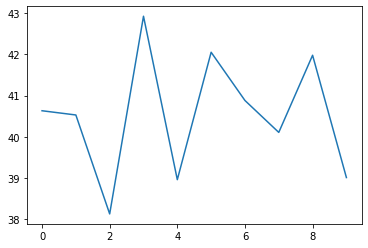

In [125]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error,mean_squared_error
iterations = 5
scores = []
scores_val = []
target = y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp.iloc[train_index],temp.iloc[test_index]
        ytrain,ytest = target.iloc[train_index],target.iloc[test_index]
        
        model  = CatBoostRegressor(learning_rate =0.0007, n_estimators =2000, random_state = 42)        

        model.fit(xtrain,ytrain,cat_features = categorical_cols)
            
        preds = model.predict(xtest)
        
        print(np.sqrt(mean_squared_error(ytest,preds)))
        scores.append(np.sqrt(mean_squared_error(ytest,preds)))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [127]:
model.fit(X_train,y_train,cat_features=categorical_cols)

# Preprocessing of validation data, get predictions
preds = model.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

0:	learn: 48.9891622	total: 9.29ms	remaining: 18.6s
1:	learn: 48.9795529	total: 21ms	remaining: 21s
2:	learn: 48.9698707	total: 28.6ms	remaining: 19s
3:	learn: 48.9597451	total: 37.9ms	remaining: 18.9s
4:	learn: 48.9501320	total: 43.5ms	remaining: 17.4s
5:	learn: 48.9405885	total: 51.6ms	remaining: 17.1s
6:	learn: 48.9316813	total: 62.8ms	remaining: 17.9s
7:	learn: 48.9223348	total: 71.2ms	remaining: 17.7s
8:	learn: 48.9126197	total: 78.3ms	remaining: 17.3s
9:	learn: 48.9026371	total: 86ms	remaining: 17.1s
10:	learn: 48.8927477	total: 94.2ms	remaining: 17s
11:	learn: 48.8828007	total: 102ms	remaining: 16.9s
12:	learn: 48.8734241	total: 109ms	remaining: 16.7s
13:	learn: 48.8634596	total: 117ms	remaining: 16.5s
14:	learn: 48.8544702	total: 124ms	remaining: 16.4s
15:	learn: 48.8452865	total: 132ms	remaining: 16.3s
16:	learn: 48.8359465	total: 139ms	remaining: 16.3s
17:	learn: 48.8262827	total: 147ms	remaining: 16.2s
18:	learn: 48.8165281	total: 155ms	remaining: 16.1s
19:	learn: 48.8069668

## Test Data Analysis

In [10]:
test.head()

Listing ID Listing Name  ...  Instant Bookable Business Travel Ready
0  13338017.0            *  ...                 f                     f
1   2899239.0            *  ...                 f                     f
2    441586.0            *  ...                 t                     f
3  19036720.0            *  ...                 t                     f
4  17890052.0            *  ...                 t                     f

[5 rows x 38 columns]

## Mising Data in Test data

In [13]:
test.isnull().sum()[test.isnull().sum() > 0] / test.shape[0]

Listing ID              0.000128
Listing Name            0.002805
Host ID                 0.000128
Host Name               0.001403
Host Since              0.001275
Host Response Time      0.450650
Host Response Rate      0.450650
Is Superhost            0.001403
Postal Code             0.014792
Bathrooms               0.001530
Bedrooms                0.000510
Beds                    0.000383
Square Feet             0.981127
First Review            0.176358
Last Review             0.176358
Overall Rating          0.193191
Accuracy Rating         0.193701
Cleanliness Rating      0.193573
Checkin Rating          0.194083
Communication Rating    0.193828
Location Rating         0.194083
Value Rating            0.193956
dtype: float64

In [46]:
test = test[['Host Response Time',
 'Is Superhost',
 'Is Exact Location',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Guests Included',
 'Instant Bookable',
 'Listing ID',
 'Host ID',
 'Latitude',
 'Longitude',
 'Square Feet',
 'Reviews',
 'Overall Rating',
 'Accuracy Rating',
 'Cleanliness Rating',
 'Checkin Rating',
 'Communication Rating',
 'Location Rating',
 'Value Rating']]
 


In [47]:
 test.shape

(7842, 21)

## Missing values in test data

In [49]:
test.isnull().sum()[test.isnull().sum() > 0] /test.shape[0]

Host Response Time      0.450650
Is Superhost            0.001403
Bathrooms               0.001530
Bedrooms                0.000510
Listing ID              0.000128
Host ID                 0.000128
Square Feet             0.981127
Overall Rating          0.193191
Accuracy Rating         0.193701
Cleanliness Rating      0.193573
Checkin Rating          0.194083
Communication Rating    0.193828
Location Rating         0.194083
Value Rating            0.193956
dtype: float64

In [58]:
test = test.drop(['Host Response Time','Square Feet'],axis=1)

In [59]:
test.head()

Is Superhost Is Exact Location  ... Location Rating Value Rating
0            t                 t  ...            10.0         10.0
1            f                 t  ...             9.0          7.0
2            f                 f  ...             9.0          9.0
3            f                 t  ...             9.0          9.0
4            f                 f  ...             NaN          NaN

[5 rows x 19 columns]

In [116]:
test = test[X.columns]

In [117]:
for col in categorical_cols:
  test[col] = categorical_transformer.transform(test[col].values.reshape(-1,1))[:,0]

In [118]:
for col in numerical_cols:
  test[col] = numerical_transformer.transform(test[col].values.reshape(-1,1))[:,0]

In [128]:
predictions = model.predict(test)

In [129]:
test['prediction'] = predictions

In [130]:
test.head()

Is Superhost Is Exact Location  ...       Price  prediction
0            t                 t  ...  137.146658  116.147803
1            f                 t  ...  108.820311   91.628582
2            f                 f  ...   70.753975   69.078088
3            f                 t  ...   78.825933   69.094520
4            f                 f  ...   74.326772   69.620509

[5 rows x 21 columns]

In [131]:
test[['prediction']].to_csv('Price_2_submission.csv',index=False)

#### * Submission Scores : 71.97(Iterations =2000)

#### * Submission successful! Your score is 53.99091442832742.(CatBoostRegressor(learning_rate =0.0007, n_estimators =2000, random_state = 42)